# Cutflow-Challenge 3.0

**Goal:** I parallelized my MDR+$\min(D_{hh})$ code, so I'm going to do *another* cutflow challenge! 

Oct 2020

In [1]:
import pandas as pd
import numpy as np
import uproot
from tqdm import tqdm
from glob import glob
import matplotlib.pyplot as plt

import os
os.sys.path.append("../code/")
from analysis import normalizeWeight
from AnalysisUtils import nanoToDf

%load_ext autoreload
%autoreload 2

/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.unsupervised module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
  warnings.warn(message, FutureWarning)


### Loading in the file processed by my fw

In [54]:
subDir = 'SMNR_mc16a_PFlow-APR2020'
df_4j = pd.read_hdf(f'../data/{subDir}/files/df_000001_MDR_4b.h5')

In [3]:
for c in df_4j.columns:
    print(c)

eventNumber
nresolvedJets
weight_pileup
resolved_nBTags
resolved_nValidPairings
resolved_isSR
resolved_isCR
resolved_isSB
resolved_nGoodJets
mcEventWeight
rand_run_nr
j0_pt
j0_eta
j0_phi
j0_E
j0_Db
j1_pt
j1_eta
j1_phi
j1_E
j1_Db
j2_pt
j2_eta
j2_phi
j2_E
j2_Db
j3_pt
j3_eta
j3_phi
j3_E
j3_Db
njets
X_wt
mc_sf
ntag_all
HLT_2j35_bmv2c2060_split_2j35_L14J15.0ETA25
HLT_j100_2j55_bmv2c2060_split
HLT_j225_bmv2c2060_split
trigger
run_number
h0_pt
h0_eta
h0_phi
h0_E
h0_barcode
h1_pt
h1_eta
h1_phi
h1_E
h1_barcode
b0_pt
b0_eta
b0_phi
b0_E
b0_parent_barcode
b1_pt
b1_eta
b1_phi
b1_E
b1_parent_barcode
b2_pt
b2_eta
b2_phi
b2_E
b2_parent_barcode
b3_pt
b3_eta
b3_phi
b3_E
b3_parent_barcode
truth_mhh
truth_pthh
b0_jidx
b0_drMatch
b1_jidx
b1_drMatch
b2_jidx
b2_drMatch
b3_jidx
b3_drMatch
j0_bidx
j1_bidx
j2_bidx
j3_bidx
j0_drMatch
j1_drMatch
j2_drMatch
j3_drMatch
correctPair
sameParent
unique
dRmatch
goodJets
ntag
GNNJets
pT_h1_pair0
eta_h1_pair0
phi_h1_pair0
m_h1_pair0
pT_h2_pair0
eta_h2_pair0
phi_h2_pair0
m

### RR version to compare to

Since I've been looking at the APR20 MNTs, I'm going to look at RR w/ the May production tag (i.e, before the trigger buckets)

Also - I'll just need to remember to only compare to the $\geq$ 4b events, since that's *all* that I've implemented (at this point).

1. Clone the repo
`git clone ssh://git@gitlab.cern.ch:7999/hh4b/hh4b-resolved-reconstruction.git --recursive`

And then I renamed it to something that I'd be able to know what the folder is for:
`mv hh4b-resolved-reconstruction/ MAY20-1-hh4b-resolved-reconstruction/`

2. Check out the tag corresponding to the MAY20-1 production

(a) RR tag
`git checkout MAY20-1`

(b) The submodule tag
`git submodule sync; git submodule update`

3. Run over the same signal samples

`resolved-recon --pTh-cuts -o sm_mdr.root --mc ../../public/hh4b/kappa_lambda/user.valentem.HH4B.600043.HH_NLO.MC16a-2015-2016.AB21.2.91-APR20-1.full_MiniNTuple.root/user.valentem.21562918._000001.MiniNTuple.root`


*The only caveat here is I had to manually reset the -b flag to default to false to get RR to run appropriately!*

Cool - I think this should do it!!

In [4]:
file_RR = '../../hh4b/MAY20-1-hh4b-resolved-reconstruction/sm_mdr_mc16a.root'

In [5]:
for k in uproot.open(file_RR).keys():
    print(k)

b'sig;1'
b'validation;1'
b'control;1'
b';2'
b'fullmassplane;1'
b'leptop_muon;1'
b'leptop_hadron;1'
b'hadtop;1'
b'everything;1'
b'TwoTagCutflow;1'
b'FourTagCutflow;1'
b'isMC;1'
b'DSID;1'
b'normalization;1'


In [6]:
RR = nanoToDf(file_RR,'everything')

everything


In [7]:
RRb = nanoToDf('../../hh4b/MAY20-1-hh4b-resolved-reconstruction/sm_mc16a_mdr_woMDpt.root','everything')

everything


In [8]:
smText = "$\mathbf{ATLAS}$ Simulation Internal\n"
smText += "SM NR mc16a APR2020 MNT\n"
smText += 'DL1r 77% WP, MDR+$\min(D_{hh})$'

In [9]:
# normalizeWeight(df,key,L[year],physToDSID[physicsSample])

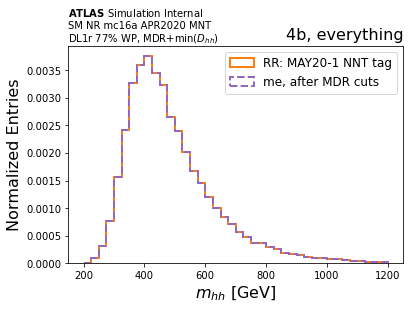

(65794, 65794)

In [59]:
edges = np.linspace(200,1200,41)

s_rr,_,_ = plt.hist(RRb.loc[RRb.ntag>=4,'m_hh'], edges, color='C1', 
                    histtype='step', label='RR: MAY20-1 NNT tag', linewidth=2,
                    weights=RRb.loc[RRb.ntag>=4,'mc_sf'],density=True)


my_mask = (df_4j.MDR) #& (df_4j.MDpT)
s_me,_,_ = plt.hist(df_4j.loc[my_mask,'m_hh'],edges, color='C4', 
                    histtype='step', label='me, after MDR cuts', linewidth=2, 
                    linestyle='--', weights=df_4j.loc[my_mask,'mc_sf'],
                    density=True)

ax = plt.gca()
plt.text(0,1,smText,ha='left',va='bottom',transform=ax.transAxes)

plt.xlabel('$m_{hh}$ [GeV]',fontsize=16)
plt.ylabel('Normalized Entries',fontsize=16)
plt.title('4b, everything',loc='right',fontsize=16)
plt.legend(fontsize=12)

plt.savefig(f'figures/{subDir}/cutflow/m_hh_cutflow_MDR.pdf',bbox_inches='tight')
plt.show()

np.sum(RRb.ntag >=4), np.sum(my_mask)

In [10]:
# from preprocess import applyCuts4jets
# applyCuts4jets(df_4j)

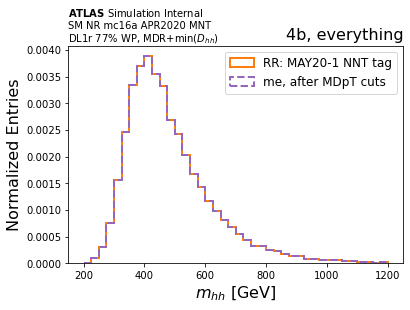

(62433, 62433)

In [77]:
edges = np.linspace(200,1200,41)

s_rr,_,_ = plt.hist(RR.loc[RR.ntag>=4,'m_hh'], edges, color='C1', 
                    histtype='step', label='RR: MAY20-1 NNT tag', linewidth=2,
                    weights=RR.loc[RR.ntag>=4,'mc_sf'],density=True)

my_mask = (df_4j.MDR) & (df_4j.MDpT)
s_me,_,_ = plt.hist(df_4j.loc[my_mask,'m_hh'],edges, color='C4', 
                    histtype='step', label='me, after MDpT cuts', linewidth=2, 
                    linestyle='--', weights=df_4j.loc[my_mask,'mc_sf'],
                    density=True)

ax = plt.gca()
plt.text(0,1,smText,ha='left',va='bottom',transform=ax.transAxes)

plt.xlabel('$m_{hh}$ [GeV]',fontsize=16)
plt.ylabel('Normalized Entries',fontsize=16)
plt.title('4b, everything',loc='right',fontsize=16)
plt.legend(fontsize=12)

plt.savefig(f'figures/{subDir}/cutflow/m_hh_cutflow_MDpT.pdf',bbox_inches='tight')
plt.show()


np.sum(RR.ntag >=4), np.sum(my_mask)

**Yey!!!** I passed!

Now just for a few more checks.


In [64]:
df_4j.columns[-20:]

Index(['m_h2', 'dRjj_h2', 'Dhh_pair0', 'Dhh_pair1', 'Dhh_pair2', 'lead_HC_pt',
       'subl_HC_pt', 'MDpT', 'abs_deta_hh', 'cut_deta_hh', 'cut_Xwt', 'Xhh',
       'kinematic_region', 'pT_2', 'pT_4', 'eta_i', 'dRjj_1', 'dRjj_2',
       'cosThetaStar', 'm_hh_cor'],
      dtype='object')

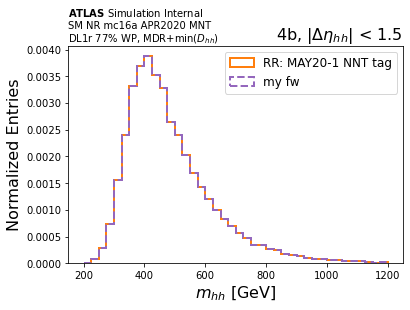

(57359, 57359)

In [67]:
edges = np.linspace(200,1200,41)

RR_mask = (RR.ntag>=4) & (np.abs(RR.eta_h1 - RR.eta_h2) < 1.5)
s_rr,_,_ = plt.hist(RR.loc[RR_mask,'m_hh'], edges, color='C1', 
                    histtype='step', label='RR: MAY20-1 NNT tag', linewidth=2,
                    weights=RR.loc[RR_mask,'mc_sf'],density=True)

my_mask = (df_4j.MDR) & (df_4j.MDpT) & (df_4j.cut_deta_hh)
s_me,_,_ = plt.hist(df_4j.loc[my_mask,'m_hh'],edges, color='C4', 
                    histtype='step', label='my framework', linewidth=2, 
                    linestyle='--', weights=df_4j.loc[my_mask,'mc_sf'],
                    density=True)

ax = plt.gca()
plt.text(0,1,smText,ha='left',va='bottom',transform=ax.transAxes)

plt.xlabel('$m_{hh}$ [GeV]',fontsize=16)
plt.ylabel('Normalized Entries',fontsize=16)
plt.title('4b, $|\Delta \eta_{hh}|$ < 1.5',loc='right',fontsize=16)
plt.legend(fontsize=12)

plt.savefig(f'figures/{subDir}/cutflow/m_hh_cutflow_deta_hh.pdf',bbox_inches='tight')
plt.show()

np.sum(RR_mask), np.sum(my_mask)

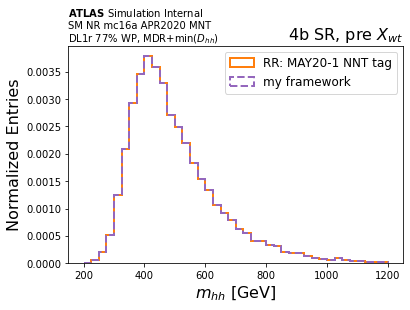

RR 29835 me 29835
RR 0.33113316620426425 me 841.2889735264183


In [75]:
edges = np.linspace(200,1200,41)

RR_mask = (RR.ntag>=4) & (np.abs(RR.eta_h1 - RR.eta_h2) < 1.5) & (RR.kinematic_region==0)
s_rr,_,_ = plt.hist(RR.loc[RR_mask,'m_hh'], edges, color='C1', 
                    histtype='step', label='RR: MAY20-1 NNT tag', linewidth=2,
                    weights=RR.loc[RR_mask,'mc_sf'],density=True)

my_mask = (df_4j.MDR) & (df_4j.MDpT) & (df_4j.cut_deta_hh) & (df_4j.kinematic_region==0)
s_me,_,_ = plt.hist(df_4j.loc[my_mask,'m_hh'],edges, color='C4', 
                    histtype='step', label='my framework', linewidth=2, 
                    linestyle='--', weights=df_4j.loc[my_mask,'mc_sf'],
                    density=True)

ax = plt.gca()
plt.text(0,1,smText,ha='left',va='bottom',transform=ax.transAxes)

plt.xlabel('$m_{hh}$ [GeV]',fontsize=16)
plt.ylabel('Normalized Entries',fontsize=16)
plt.title('4b SR, pre $X_{wt}$',loc='right',fontsize=16)
plt.legend(fontsize=12)

plt.savefig(f'figures/{subDir}/cutflow/m_hh_cutflow_SR.pdf',bbox_inches='tight')
plt.show()

print('RR',np.sum(RR_mask), 'me',np.sum(my_mask))
print('RR',np.sum(RR.loc[RR_mask,'mc_sf']), 'me',np.sum(df_4j.loc[my_mask,'mc_sf']))

In [76]:
edges = np.linspace(200,1200,41)

RR_mask = (RR.ntag>=4) & (np.abs(RR.eta_h1 - RR.eta_h2) < 1.5) & (RR.kinematic_region==0) & (RR.X_wt > 1.5)
s_rr,_,_ = plt.hist(RR.loc[RR_mask,'m_hh'], edges, color='C1', 
                    histtype='step', label='RR: MAY20-1 NNT tag', linewidth=2,
                    weights=RR.loc[RR_mask,'mc_sf'],density=True)

my_mask = (df_4j.MDR) & (df_4j.MDpT) & (df_4j.cut_deta_hh) & (df_4j.kinematic_region==0) & (df_4j.X_wt > 1.5)
s_me,_,_ = plt.hist(df_4j.loc[my_mask,'m_hh'],edges, color='C4', 
                    histtype='step', label='my fw', linewidth=2, 
                    linestyle='--', weights=df_4j.loc[my_mask,'mc_sf'],
                    density=True)

ax = plt.gca()
plt.text(0,1,smText,ha='left',va='bottom',transform=ax.transAxes)

plt.xlabel('$m_{hh}$ [GeV]',fontsize=16)
plt.ylabel('Normalized Entries',fontsize=16)
plt.title('4b SR, post $X_{wt}$',loc='right',fontsize=16)
plt.legend(fontsize=12)

plt.savefig(f'figures/{subDir}/cutflow/m_hh_cutflow_SR_Xwt.pdf',bbox_inches='tight')
plt.show()

print('RR',np.sum(RR_mask), 'me',np.sum(my_mask))

RR 26108 me 26107


In [20]:
cutflow_4b

RR; 4b
Initial                   26760.097015
Selected                  26760.097015
NTuple                        7.600059
Trigger                       4.295076
4 good jets, >= 2 tagged      3.395702
Multi Tagged                  0.820158
Valid                         0.737453
pT(h)s                        0.698345
dEta_hh                       0.637761
Muon LepTop                   0.000239
Electron LepTop               0.000380
HadTop                        0.034414
Main Xwt                      0.530586
Signal                        0.287896
Validation                    0.141080
Control                       0.062281

In [21]:
np.sum(RR.loc[RR.ntag >=4,'mc_sf'])

0.6983446229152908

In [56]:
from preprocess import applyCuts4jets
applyCuts4jets(df_4j)

Calculating Xhh


/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/uproot_methods/classes/TLorentzVector.py:216: RuntimeWarning: invalid value encountered in true_divide
  out["fX"] = self.x / self.t
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/uproot_methods/classes/TLorentzVector.py:217: RuntimeWarning: invalid value encountered in true_divide
  out["fY"] = self.y / self.t
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/uproot_methods/classes/TLorentzVector.py:218: RuntimeWarning: invalid value encountered in true_divide
  out["fZ"] = self.z / self.t
/gpfs/slac/atlas/fs1/d/rafaeltl/public/conda/miniconda3/envs/py3/lib/python3.7/site-packages/awkward/array/table.py:699: RuntimeWarning: invalid value encountered in true_divide
  newcolumns[n] = getattr(ufunc, method)(*x, **kwargs)


In [23]:
x,c = np.unique(RR.loc[RR.ntag >=4,'event_number'],return_counts=True)
np.max(c)

1

In [24]:
inRR = []

for i in RR.loc[RR.ntag >=4,'event_number']:
    if not (i in df_4j.loc[my_mask,'eventNumber'].values):
        print(i)
        inRR.append(i)
        
    if len(inRR) > 10:
        break

In [25]:
cols = ['j0_pt',
        'j0_eta',
        # 'j0_phi',
        # 'j0_E',
        'j0_Db',
        'j1_pt',
        'j1_eta',
        # 'j1_phi',
        # 'j1_E',
        'j1_Db',
        'j2_pt',
        'j2_eta',
        # 'j2_phi',
        # j2_E
        'j2_Db',
        'j3_pt',
        'j3_eta',
        # j3_phi
        # j3_E
        'j3_Db',
        'njets',
        'X_wt',
        'mc_sf',
        'ntag_all',
        'truth_mhh',
        'm_hh',
        'correctPair',
        'nValidPairs',
        'MDR',
        'MDpT',
        'chosenPair',
        'lead_HC_pt',
        'subl_HC_pt',
        'Xhh',
        'kinematic_region',
        'cosThetaStar',
        'm_hh_cor']

In [26]:
inRR

[]

In [27]:
mask = np.zeros_like(df_4j.index).astype(bool)
for i in inRR:
    mask[df_4j.eventNumber==i] = True

In [28]:
RR_mask = np.zeros_like(RR.index).astype(bool)
for i in inRR:
    RR_mask[RR.event_number==i] = True

In [29]:
df_4j.loc[mask,cols]

Empty DataFrame
Columns: [j0_pt, j0_eta, j0_Db, j1_pt, j1_eta, j1_Db, j2_pt, j2_eta, j2_Db, j3_pt, j3_eta, j3_Db, njets, X_wt, mc_sf, ntag_all, truth_mhh, m_hh, correctPair, nValidPairs, MDR, MDpT, chosenPair, lead_HC_pt, subl_HC_pt, Xhh, kinematic_region, cosThetaStar, m_hh_cor]
Index: []

[0 rows x 29 columns]

In [30]:
RR_cols = [f'{v}_h{hi}_j{ji}' for hi in [1,2] for ji in [1,2] for v in ['pT','quantile']]+['njets','ntag','X_wt']
RR.loc[RR_mask,RR_cols]

Empty DataFrame
Columns: [pT_h1_j1, quantile_h1_j1, pT_h1_j2, quantile_h1_j2, pT_h2_j1, quantile_h2_j1, pT_h2_j2, quantile_h2_j2, njets, ntag, X_wt]
Index: []

**Ok - it's a little hard to sort out this b/c the lists are in a different order.**

Let's start by comparing the event w/ 8 jets!

In [31]:
df_4j.loc[mask&(df_4j.njets==8),cols[:10]+['eventNumber']]

Empty DataFrame
Columns: [j0_pt, j0_eta, j0_Db, j1_pt, j1_eta, j1_Db, j2_pt, j2_eta, j2_Db, j3_pt, eventNumber]
Index: []

In [32]:
RR.loc[RR_mask & (RR.njets==8), RR_cols+['event_number']]

Empty DataFrame
Columns: [pT_h1_j1, quantile_h1_j1, pT_h1_j2, quantile_h1_j2, pT_h2_j1, quantile_h2_j1, pT_h2_j2, quantile_h2_j2, njets, ntag, X_wt, event_number]
Index: []

**Good news:** I now have *all* of the events passing RR also passing my fw.

In [38]:
inMine = []

for i in df_4j.loc[my_mask,'eventNumber']:
    if not (i in RR.loc[RR.ntag >=4,'event_number'].values):
        print(i)
        inMine.append(i)
        
    if len(inMine) > 10:
        break

285004
286847
288924
288096
288700
304687
327671
328503
328081
340065
340328


In [34]:
# lead_pT_cut = 0.5  * df_4j.m_hh - 103
# subl_pT_cut = 0.33 * df_4j.m_hh -  73
# df_4j['MDpT_alt'] = (df_4j.pT_h1 > lead_pT_cut) & (df_4j.pT_h1 > subl_pT_cut) 

In [39]:
mask = np.zeros_like(df_4j.index).astype(bool)
for i in inMine:
    mask[df_4j.eventNumber==i] = True
    
df_4j.loc[mask,cols[:14]+['eventNumber','MDR','nValidPairs','m_hh','MDpT','eta_h1','eta_h2']]

j0_pt    j0_eta  j0_Db       j1_pt    j1_eta  j1_Db       j2_pt  \
entry                                                                         
508    186.403580 -1.010048    5.0   94.117920 -1.872845    5.0   53.027512   
902    119.526062  0.010752    4.0   80.455574  0.401103    5.0   66.137543   
2413   159.310165 -0.515706    5.0  149.732819 -0.082799    5.0  115.644028   
2559   109.613197 -1.413721    5.0   70.705673 -0.311278    5.0   66.034859   
2640    87.609459  1.033137    5.0   62.996193 -0.117587    5.0   61.589470   
3373    83.213150 -0.126814    5.0   79.946709  0.534236    5.0   43.718643   
5753   202.111343  0.396462    5.0   71.991043  1.112849    5.0   58.916176   
6238   103.072586 -0.454895    5.0   55.158630  1.220770    4.0   52.216454   
7091    84.373901  1.006057    5.0   58.897060  1.084340    5.0   57.914806   
7976   101.229477 -0.044700    4.0   68.604385  1.206465    5.0   64.372139   
8356    76.711952 -1.020467    3.0   72.160393 -0.287097    4.0   69.977013   

         j2_eta  j2_Db      j3_pt  ...  j3_Db  njets      X_wt  eventNumber  \
entry                              ...                                        
508   -1.090637    5.0  52.267086  ...    5.0      5  3.887124       285004   
902    2.420740    5.0  61.124344  ...    5.0      4  4.808962       286847   
2413   1.932429    5.0  64.954582  ...    5.0      5  5.969043       288924   
2559  -0.728700    5.0  57.143658  ...    3.0      5  2.169507       288096   
2640  -0.950724    3.0  45.889538  ...    4.0      5  2.556766       288700   
3373  -0.927676    5.0  40.536411  ...    5.0      6  0.684283       304687   
5753  -0.259246    4.0  48.095039  ...    5.0      6  1.089266       327671   
6238  -1.031239    5.0  44.673058  ...    4.0      7  0.388665       328503   
7091  -1.046981    5.0  54.999893  ...    4.0      4  3.158984       328081   
7976  -0.764907    5.0  58.357487  ...    5.0      5  2.392419       340065   
8356  -0.295936    5.0  50.883873  ...    5.0      5  2.437628       340328   

        MDR  nValidPairs        m_hh  MDpT    eta_h1    eta_h2  
entry                                                           
508    True            2  374.610976  True -1.378926 -2.692475  
902    True            1  480.196390  True  0.200640  2.500535  
2413   True            1  740.274953  True -0.327059  1.758590  
2559   True            2  354.681590  True -1.252417 -0.734813  
2640   True            2  316.349887  True  0.651010 -2.544519  
3373   True            3  277.095516  True  0.464850 -1.247587  
5753   True            2  372.584521  True  0.641188 -0.656376  
6238   True            1  341.253359  True -0.836876  2.524792  
7091   True            1  368.677558  True  1.438872 -1.878513  
7976   True            2  361.451429  True  0.727185 -1.359958  
8356   True            3  310.944040  True -1.405572  0.712836  

[11 rows x 21 columns]

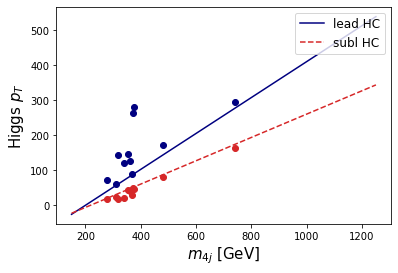

In [48]:
m4j = np.linspace(150,1250)
lead_pT_cut = 0.513333 * m4j - 103.3333
subl_pT_cut = 0.33333  * m4j -  73.3333


plt.plot(m4j,lead_pT_cut,color='navy',label='lead HC')
plt.plot(m4j,subl_pT_cut,color='C3',ls='--',label='subl HC')


plt.xlabel('$m_{4j}$ [GeV]',fontsize=15)
plt.ylabel('Higgs $p_T$',fontsize=15)

plt.legend(loc='upper right',fontsize=12)


# Debugging - add in one of the eventsx of interest
mi = df_4j.loc[mask,'m_hh']
pT1s,pT2s = df_4j.loc[mask,[f'lead_HC_pt',f'subl_HC_pt']].values.T

plt.scatter(mi,pT1s,marker='o',color='navy')
plt.scatter(mi,pT2s,marker='o',color='C3')

plt.show()

Ok - smth is fucked, but idk what.

In [50]:
lead_pT_cut = 0.513333 * df_4j.loc[mask,'m_hh'].values - 103.3333
subl_pT_cut = 0.33333  * df_4j.loc[mask,'m_hh'].values -  73.3333

In [51]:
pT1s > lead_pT_cut

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [52]:
pT2s > subl_pT_cut

array([False, False, False, False, False, False, False, False, False,
       False, False])

In [53]:
pT1s>pT2s

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

- I don't think it's an issue w/ the MDpT cut, b/c even when I swap out the HC defn for MDpT, the event passes
- Could it be an issue w/ jets being close to the edge of the detector?

In [ ]:
np.max(df_4j.loc[mask,[f'j{i}_eta' for i in range(4)]].abs(),axis=1)

In [ ]:
f = uproot.open('../../public/hh4b/kappa_lambda/user.valentem.HH4B.600043.HH_NLO.MC16a-2015-2016.AB21.2.91-APR20-1.full_MiniNTuple.root/user.valentem.21562918._000001.MiniNTuple.root')
mnt = f['XhhMiniNtuple']

In [ ]:
for k in mnt.keys():
    print(k)

### Midplay summary

Ok, so the issue is with my jet selection, I'm *not* correctly picking up the leading $b$-jets

In [ ]:
assert True == False

In [ ]:
filename = '/gpfs/slac/atlas/fs1/d/nhartman/public/hh4b/'
filename+= 'kappa_lambda/user.valentem.HH4B.600043.HH_NLO.'
filename+= 'MC16a-2015-2016.AB21.2.91-APR20-1.full_MiniNTuple.root/'
filename+= 'user.valentem.21562918._000001.MiniNTuple.root'

In [ ]:
year = 2016
pT_min = 40
eta_max = 2.5
mc = True

In [ ]:
# Open the file
print(f"\nOpening {filename}")
f = uproot.open(filename)
tree = f['XhhMiniNtuple']

print('Loading in the event df')
evt_vars = ['eventNumber', 'nresolvedJets','weight_pileup']
evt_vars += [f'resolved_{e}' for e in ['nBTags','nValidPairings','isSR','isCR','isSB','nGoodJets']]
if mc:
    print('Running on mc')
    evt_vars += ['mcEventWeight','rand_run_nr']
else:
    evt_vars += ['runNumber']
df = tree.pandas.df(evt_vars)

# Get the jets
jet_vars = ['pt','eta','phi','E','is_DL1r_FixedCutBEff_77','Quantile_DL1r_Continuous']
jVars = ['pt','eta','phi','E','Db']
if mc:
    jet_vars += ['SF_DL1r_FixedCutBEff_77']#,'SF_DL1r_Continuous']
pre = 'resolvedJets'
jet_vars = [f'{pre}_{v}' for v in jet_vars]
myCols = [f'j{i}_{v}' for i in range(4) for v in jVars] + ['njets']
for c in myCols:
    df[c] = 0

print('Loading in the jet array')
arr = tree.arrays(jet_vars)
ks = [v.encode() for v in jet_vars[:5]]
df['X_wt']  = -1
df['njets'] = -1
df['mc_sf'] = 1

In [ ]:
from preprocess import parallelXwt

In [ ]:
btags

In [ ]:
for nresJets in range(4,np.max(df.nresolvedJets)+1):

    mask = (df['nresolvedJets'] == nresJets)
    if np.sum(mask) == 0: continue

    # Use the jet pt and eta functions to define masks
    jpts  = arr[b'resolvedJets_pt'][mask].flatten().reshape(-1, nresJets)
    jetas = arr[b'resolvedJets_eta'][mask].flatten().reshape(-1,nresJets)
    btags = arr[b'resolvedJets_is_DL1r_FixedCutBEff_77'][mask].flatten().reshape(-1,nresJets).astype(bool)

    jmask = (jpts > pT_min) & (np.abs(jetas) < eta_max) 

    njets = np.sum(jmask,axis = 1)
    df.loc[mask,'njets'] = njets

    bmask = jmask & btags
    not_b = jmask & ~btags
    df.loc[mask,'ntag_all'] = np.sum(bmask,axis=1)

    for nj in range(4,nresJets+1):

        m = mask.copy()
        m[mask] = (njets == nj)
        #N = min(nj,nJetsMax)

        if (np.sum(m) == 0) or (np.sum(jmask[njets == nj]) == 0): continue

        if mc:

            # Only keep calculating the SF up until we have 4 b-jets in the event, so need the array
            # for the tagging decisions
            k = b'resolvedJets_is_DL1r_FixedCutBEff_77'
            is_77 = arr[k][m].flatten().reshape(-1,nresJets)[jmask[njets == nj]].reshape(-1,nj)

            # Need to access the first el of the array, b/c the others are for the FTAG eigenvariations
            sf_77 = np.array([[ci[0] for ci in c] for c in arr[f'{pre}_SF_DL1r_FixedCutBEff_77'.encode()][m]])[jmask[njets == nj]].reshape(-1,nj)

            # Sort by b-tag decision (there's some index trickery b/c the argsort sorts in descending order,
            # and when b-tag decision didn't discriminate b/w jets I wanted to take the leading one)
            rev_idx = np.arange(nj)[::-1]
            idx_b4 = rev_idx[np.argsort(is_77[:,::-1],axis=1)[:,-4]]

            # This logic is only valid for 4b rn, so only consider events where the 4th b is the 4th el
            # of the array
            sf_evt = np.ones_like(idx_b4).astype(float)
            for i in range(3,nj):
                sf_evt[idx_b4==i] = np.prod(sf_77[idx_b4==i,:i+1],axis=1)
                df.loc[m,'mc_sf'] = sf_evt
        # Xwt        
        if nj >= 4:
            arr_3d = np.dstack([arr[k][m].flatten().reshape(-1,nresJets)[jmask[njets == nj]].reshape(-1,nj) 
                                for k in ks])
            df.loc[m,'X_wt'] = parallelXwt(arr_3d)

        '''
        And now fill w/ jet-level info
        '''
        for ib in range(4,nj+1):
            
            # First sort by b-tag decision - then by jet pT
            jpt_all = arr[b'resolvedJets_pt'][m& (df.ntag_all==ib)].flatten().reshape(-1,nresJets)
            
            mi = (njets==nj ) & (df.loc[mask,'ntag_all']==ib)
            Ni = np.sum(mi)
            
            pt_tag = jpt_all[ bmask[mi] ].reshape(-1,ib)
            i_tag = np.argsort(pt_tag,axis=1)[:,::-1]
            
            if nj > ib:
                pt_not = jpt_all[ not_b[mi] ].reshape(-1,nj-ib) 
                i_not = np.argsort(pt_not,axis=1)[:,::-1]
            
            for v,w in zip(jVars[:5], jVars[:4]+['Quantile_DL1r_Continuous']):
                k = f'resolvedJets_{w}'.encode()

                total = arr[k][m& (df.ntag_all==ib)].flatten().reshape(-1,nresJets)
                
                v_tag = total[ bmask[mi] ].reshape(-1,ib)
                v_tag_sort = np.vstack([v_tag[np.arange(Ni),i_tag[:,iit]] for iit in range(ib)]).T
                
                
                if nj > ib:
                    v_not = total[ not_b[mi] ].reshape(-1,nj-ib)
                    v_not_sort = np.vstack([v_not[np.arange(Ni),i_not[:,iin]] 
                                            for iin in range(nj-ib)]).T
                    jarr = np.concatenate([v_tag_sort ,v_not_sort],axis=1)
                else:
                    jarr = v_tag_sort
                
                if nj <= 4:
                    df.loc[m & (df.ntag_all==ib),[f'j{i}_{v}' for i in range(nj)]] = jarr     
                else:
                    df.loc[m & (df.ntag_all==ib),[f'j{i}_{v}' for i in range(4)]] = jarr[:,:4]
    
    
        print(f'  Jet sfs for evts with {nj} selected jets out of {nresJets} resolved jets')
        if (nj==8) and (nresJets==9):
            break
    
    if (nj==8) and (nresJets==9):
        break
            

In [ ]:
df.loc[(df.njets==4) & (df.ntag_all == 4),cols[:10]]

In [ ]:
from analysis import triggers
import json

with open("../code/hashMap.json", 'r') as varfile:
    hashMap = json.load(varfile)
triggerHashes = { year : [ hashMap[ti] for ti in triggers[year] ] for year in [2015,2016,2017,2018] }


In [ ]:
from preprocess import truthInfo, parallelTruthMatchJets, parallelGetCorrectPair

In [ ]:
# Get the analysis trigger decision
print(f'Applying {year} triggers')
passedTriggerHashes = tree.array(b'passedTriggerHashes')

for ti in triggers[year]:
    df[ti] = (passedTriggerHashes == hashMap[ti]).sum().astype(bool)
df['trigger'] = df[triggers[year]].sum(axis=1).astype(bool)

print('Only considering 4b events')

if mc:
    df['mc_sf'] *= (df['mcEventWeight'] * df['weight_pileup']) 
    df['run_number'] = df['rand_run_nr']

    # Also save the truth info
    truthInfo(tree, df)
    parallelTruthMatchJets(df, 4)
    parallelGetCorrectPair(df, 4)


Ok - so we've been able to isolate the issue to a sorting problem (I think).
- I'm not sorting, b/c I was assuming that XhhCommon was already ordering the jets by $p_T$.

In [ ]:
cols

In [ ]:
df.loc[df.eventNumber==681239,cols[:10]]

In [ ]:
jarr

In [ ]:
ib = 5
k = b'resolvedJets_pt'
jarr = arr[k][m& (df.ntag_all==ib)].flatten().reshape(-1,nresJets)[bmask[(njets==nj)& (df.loc[mask,'ntag_all']==ib)].astype(bool)].reshape(-1,ib)
            

In [ ]:
jarr[10]

In [ ]:
k = b'resolvedJets_Quantile_DL1r_Continuous'
jarr = arr[k][m& (df.ntag_all==ib)].flatten().reshape(-1,nresJets)[bmask[(njets==nj)& (df.loc[mask,'ntag_all']==ib)].astype(bool)].reshape(-1,ib)

jarr[10]

In [ ]:
nj,nresJets

In [ ]:
ib = 5

k = b'resolvedJets_pt'
total = arr[k][m& (df.ntag_all==ib)].flatten().reshape(-1,nresJets)

#submask = bmask[.astype(bool) 
mi = (njets==nj ) & (df.loc[mask,'ntag_all']==ib)
tagged = total[ bmask[mi] ].reshape(-1,ib)
nottag = total[ not_b[mi] ].reshape(-1,nj-ib)



# k = b'resolvedJets_Quantile_DL1r_Continuous'
# jDb = arr[k][m& (df.ntag_all==ib)].flatten().reshape(-1,nresJets)[bmask[(njets==nj)& (df.loc[mask,'ntag_all']==ib)].astype(bool)].reshape(-1,ib)


In [ ]:

Ni = np.sum(mi)
i_tag = np.argsort(tagged,axis=1)[:,::-1]
i_not = np.argsort(nottag,axis=1)[:,::-1]

In [ ]:
tagged.shape

In [ ]:
tagged[np.arange(Ni),i_tag[:,0]]

In [ ]:
np.vstack([tagged[np.arange(Ni),i_tag[:,iit]] for iit in range(ib)]).T[10] #.shape

In [ ]:
# jvars = np.concatenate([tagged[np.arange(Ni),i_tag],nottag[np.arange(Ni),i_not]],axis=1)

In [ ]:
i_not

In [ ]:
submask

In [ ]:
total

In [ ]:
jpt

In [ ]:
jDb

In [ ]:
test_arr = np.array(np.dstack([jpt,jDb]).swapaxes(1,2),dtype=[('pT','f4'),('Db','i4')])

In [ ]:
test_arr.shape

In [ ]:
test_arr['Db'].shape,arr['pT'].shape

### Nice - we have now isolated what the problem is!

I assumed the jets in XhhCommon were ordered by the jet $p_T$, but since we're saving the jets that have the $\mu$-in-jet + pTreco correction, I'm guessing that the jets are actually ordered by the jet $p_T$ before this step.

In [ ]:
from eventDisplays import truthDisplay

In [ ]:
?truthDisplay

In [ ]:
jdf = tree.pandas.df(jet_vars + [f'{pre}_HadronConeExclTruthLabelID'])

In [ ]:
for k in tree.keys():
    if 'muon_' in k.decode():
        print(k.decode())

In [ ]:
muon_vars = [f'muon_{v}' for v in ['pt','eta','phi','EnergyLoss','MeasEnergyLoss','ParamEnergyLoss']]
mdf = tree.pandas.df(muon_vars)

In [ ]:
mdf.iloc[i]

In [ ]:
inRR

In [ ]:
df_4j[df_4j.eventNumber==inRR[0]].index[0]

In [ ]:
for ii in inRR:

    i = df_4j[df_4j.eventNumber==ii].index[0]

    truthDisplay(i,df,triggerKey=True,mode=1,jdf=jdf,mdf=mdf,tagger='DL1r',WP=77,quantile=True,
                 text=smText,figDir=f'figures/{subDir}/eventDisplays/pTreco_sort')